<a href="https://colab.research.google.com/github/leilaabdel/breast-cancer-multiomic-networks/blob/main/notebooks/network_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

In [ ]:
#Make sure to change this for your own paths
ROOT = '/content/drive/My Drive/Masters-Program/courses/ece-735-networks/breast-cancer-pathways-networks'
BREAST_CANCER_NETWORK_PATH = ROOT + '/data/combined-metabolite-protein-list/metabolite-protein-interact.csv'

In [ ]:
G_undir = pickle.load(open(ROOT + '/data/undirected_graph.pickle' , 'rb'))
G_dir = pickle.load(open(ROOT + '/data/directed_graph.pickle' , 'rb'))

## Clustering

In [ ]:
# I read the documentation for this function and it implmenets the Chung Laplacian Equation
L_C = nx.directed_combinatorial_laplacian_matrix(G_dir)


In [ ]:
import scipy
# w are the eigenvalues
# v are the eigenvectors
w, v = scipy.linalg.eig(L_C)

In [ ]:
x.shape

(276,)

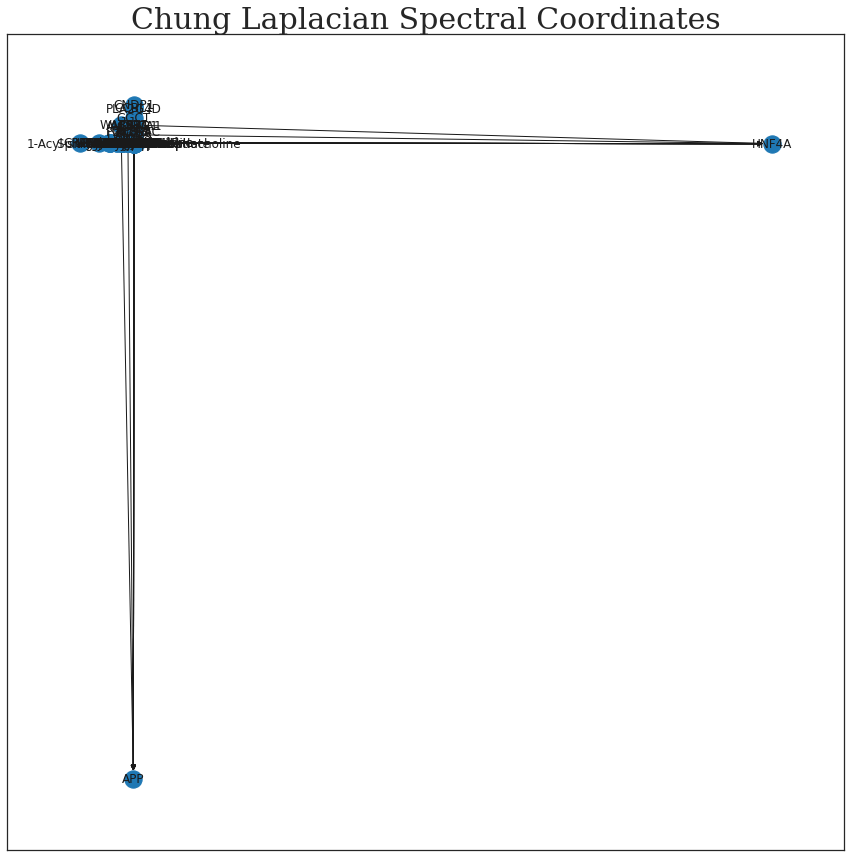

In [ ]:
x = v[:,1]
y = v[:,2]
ns = list(G_dir.nodes())
spectral_coordinates = {ns[i] : [float(x[i]), float(y[i])] for i in range(len(x))}
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_dir , pos = spectral_coordinates)
plt.title("Chung Laplacian Spectral Coordinates" , fontsize=30)
plt.show()


In [ ]:
X = []
for i , j in spectral_coordinates.values():
  X.append((i,j))

In [ ]:
X = np.asarray(X)
X.shape

(276, 2)

In [ ]:
sns.set(font_scale=4.5)
sns.set_style("white")
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['/content/times new roman.ttf'])
mpl.rc('font', family='Serif')

--2020-11-17 22:21:03--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-11-17 22:21:03--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.3’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.006s  

2020-11-17 22:21:03 (14.7 MB/s) - ‘thsa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

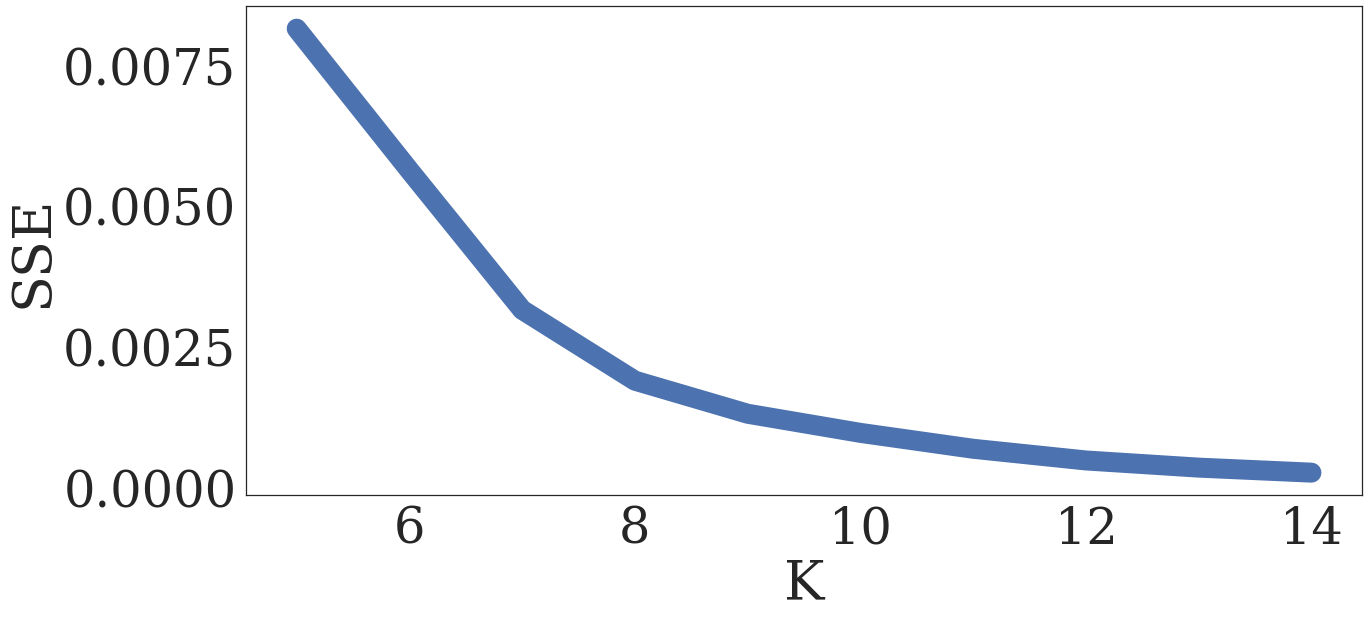

In [ ]:
from sklearn.cluster import KMeans
data = pd.DataFrame()

sse = {}
for k in range(5, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
fig = plt.figure(figsize=(20,10))
plt.plot(list(sse.keys()), list(sse.values()) , linewidth=20)
plt.xlabel("K")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()
fig.savefig('sse.eps', dpi=300)

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
groupings = kmeans.labels_

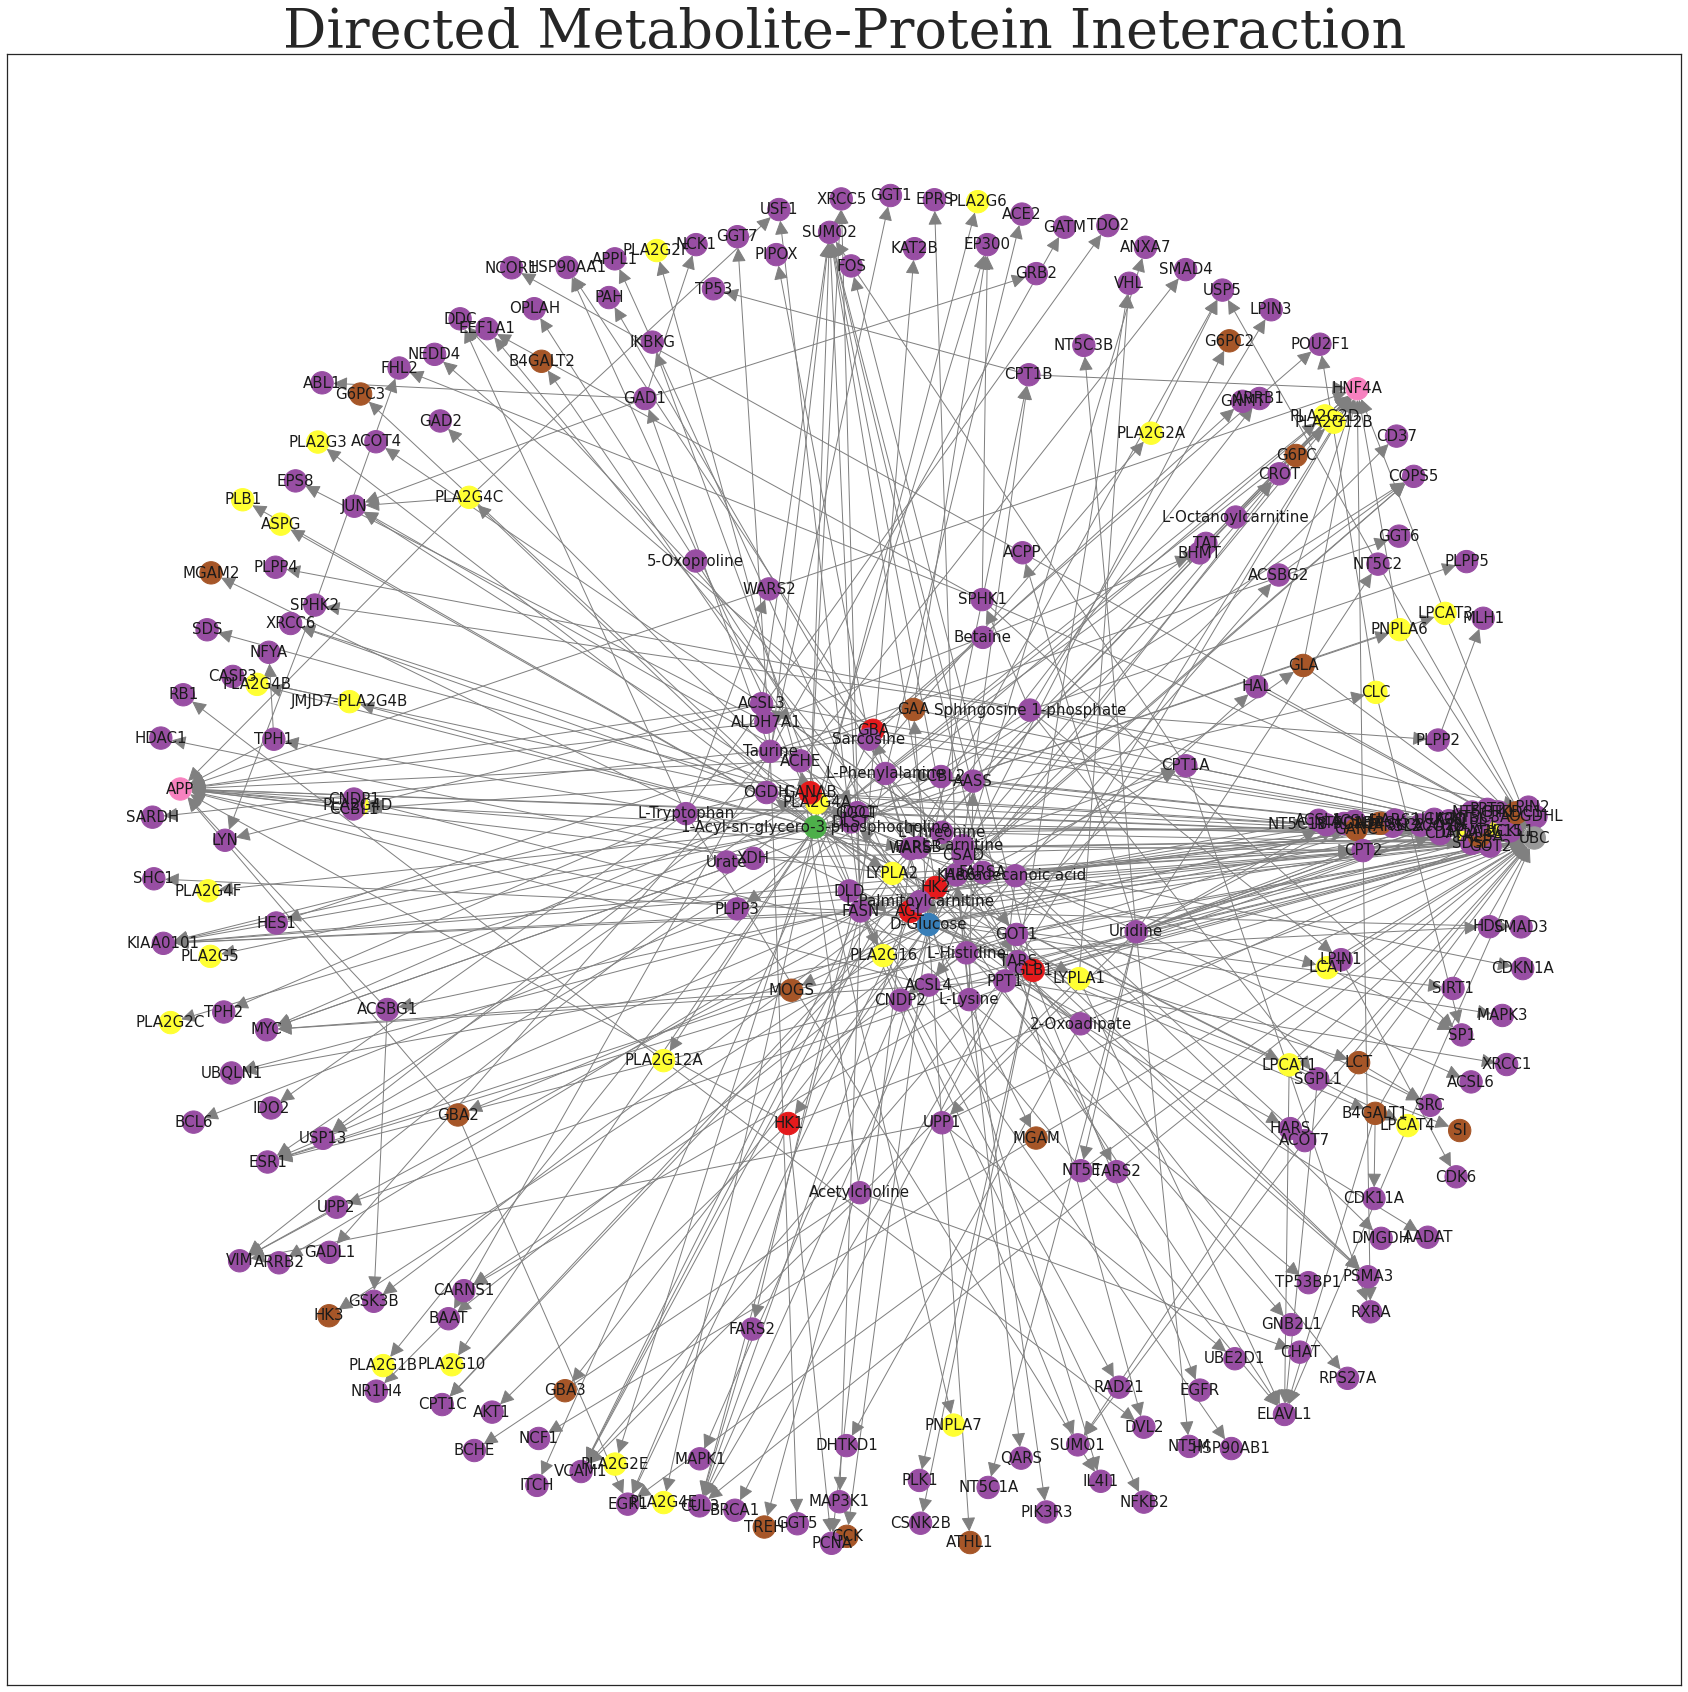

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_networkx(G_dir , font_size=15, cmap='Set1', edge_color='gray', node_size=500, arrowsize=30 , node_color=groupings )
KEGG_ID = "HSA05224"
plt.title("Directed Metabolite-Protein Ineteraction")
plt.savefig('directed-graph.eps', dpi=300)

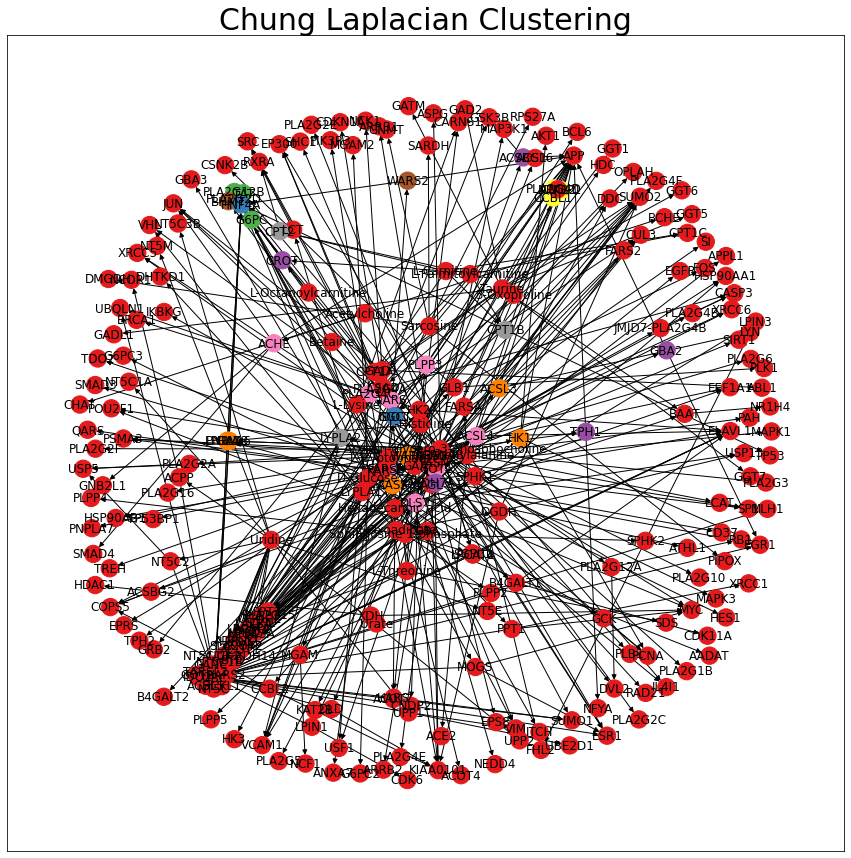

In [ ]:
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_dir , node_color=groupings , cmap='Set1')
plt.title("Chung Laplacian Clustering" , fontsize=30)
plt.show()

## Undirected Graph

In [ ]:
A = nx.adjacency_matrix(G_undir)

In [ ]:
a_shape = A.shape
a_diagonals = A.sum(axis=1)
D = scipy.sparse.spdiags(a_diagonals.flatten(),
                         [0],
                         a_shape[0],
                         a_shape[1],
                         format='csr')

In [ ]:
L = (D - A)

In [ ]:
# w are the eigenvalues
# v are the eigenvectors
w, v = scipy.linalg.eig(L.todense())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


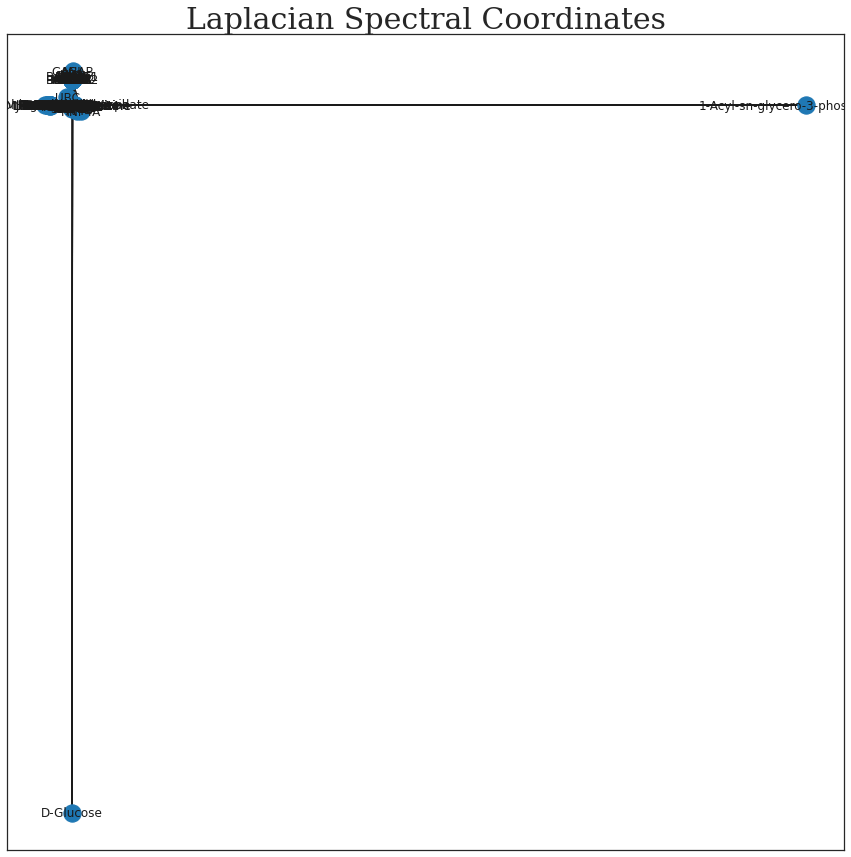

In [ ]:
x = v[:,1]
y = v[:,2]
ns = list(G_undir.nodes())
spectral_coordinates = {ns[i] : [float(x[i]), float(y[i])] for i in range(len(x))}
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_undir , pos = spectral_coordinates)
plt.title("Laplacian Spectral Coordinates" , fontsize=30)
plt.show()

# As you can see there are more connected nodes over others

In [ ]:
X = []
for i , j in spectral_coordinates.values():
  X.append((i,j))

In [ ]:
X = np.asarray(X)
X.shape

(276, 2)

<Figure size 432x288 with 0 Axes>

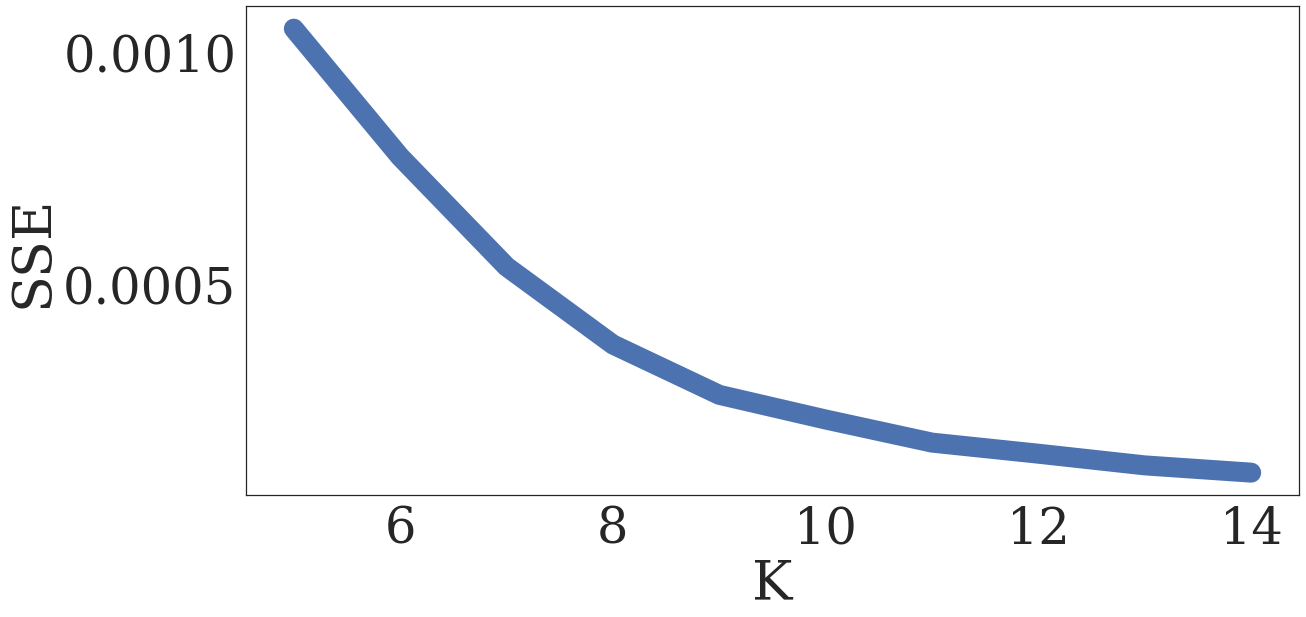

In [ ]:
from sklearn.cluster import KMeans
data = pd.DataFrame()

sse = {}
for k in range(5, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
fig = plt.figure(figsize=(20,10))
plt.plot(list(sse.keys()), list(sse.values()) , linewidth=20)
plt.xlabel("K")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()
fig.savefig('sse.eps', dpi=300)

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
groupings = kmeans.labels_

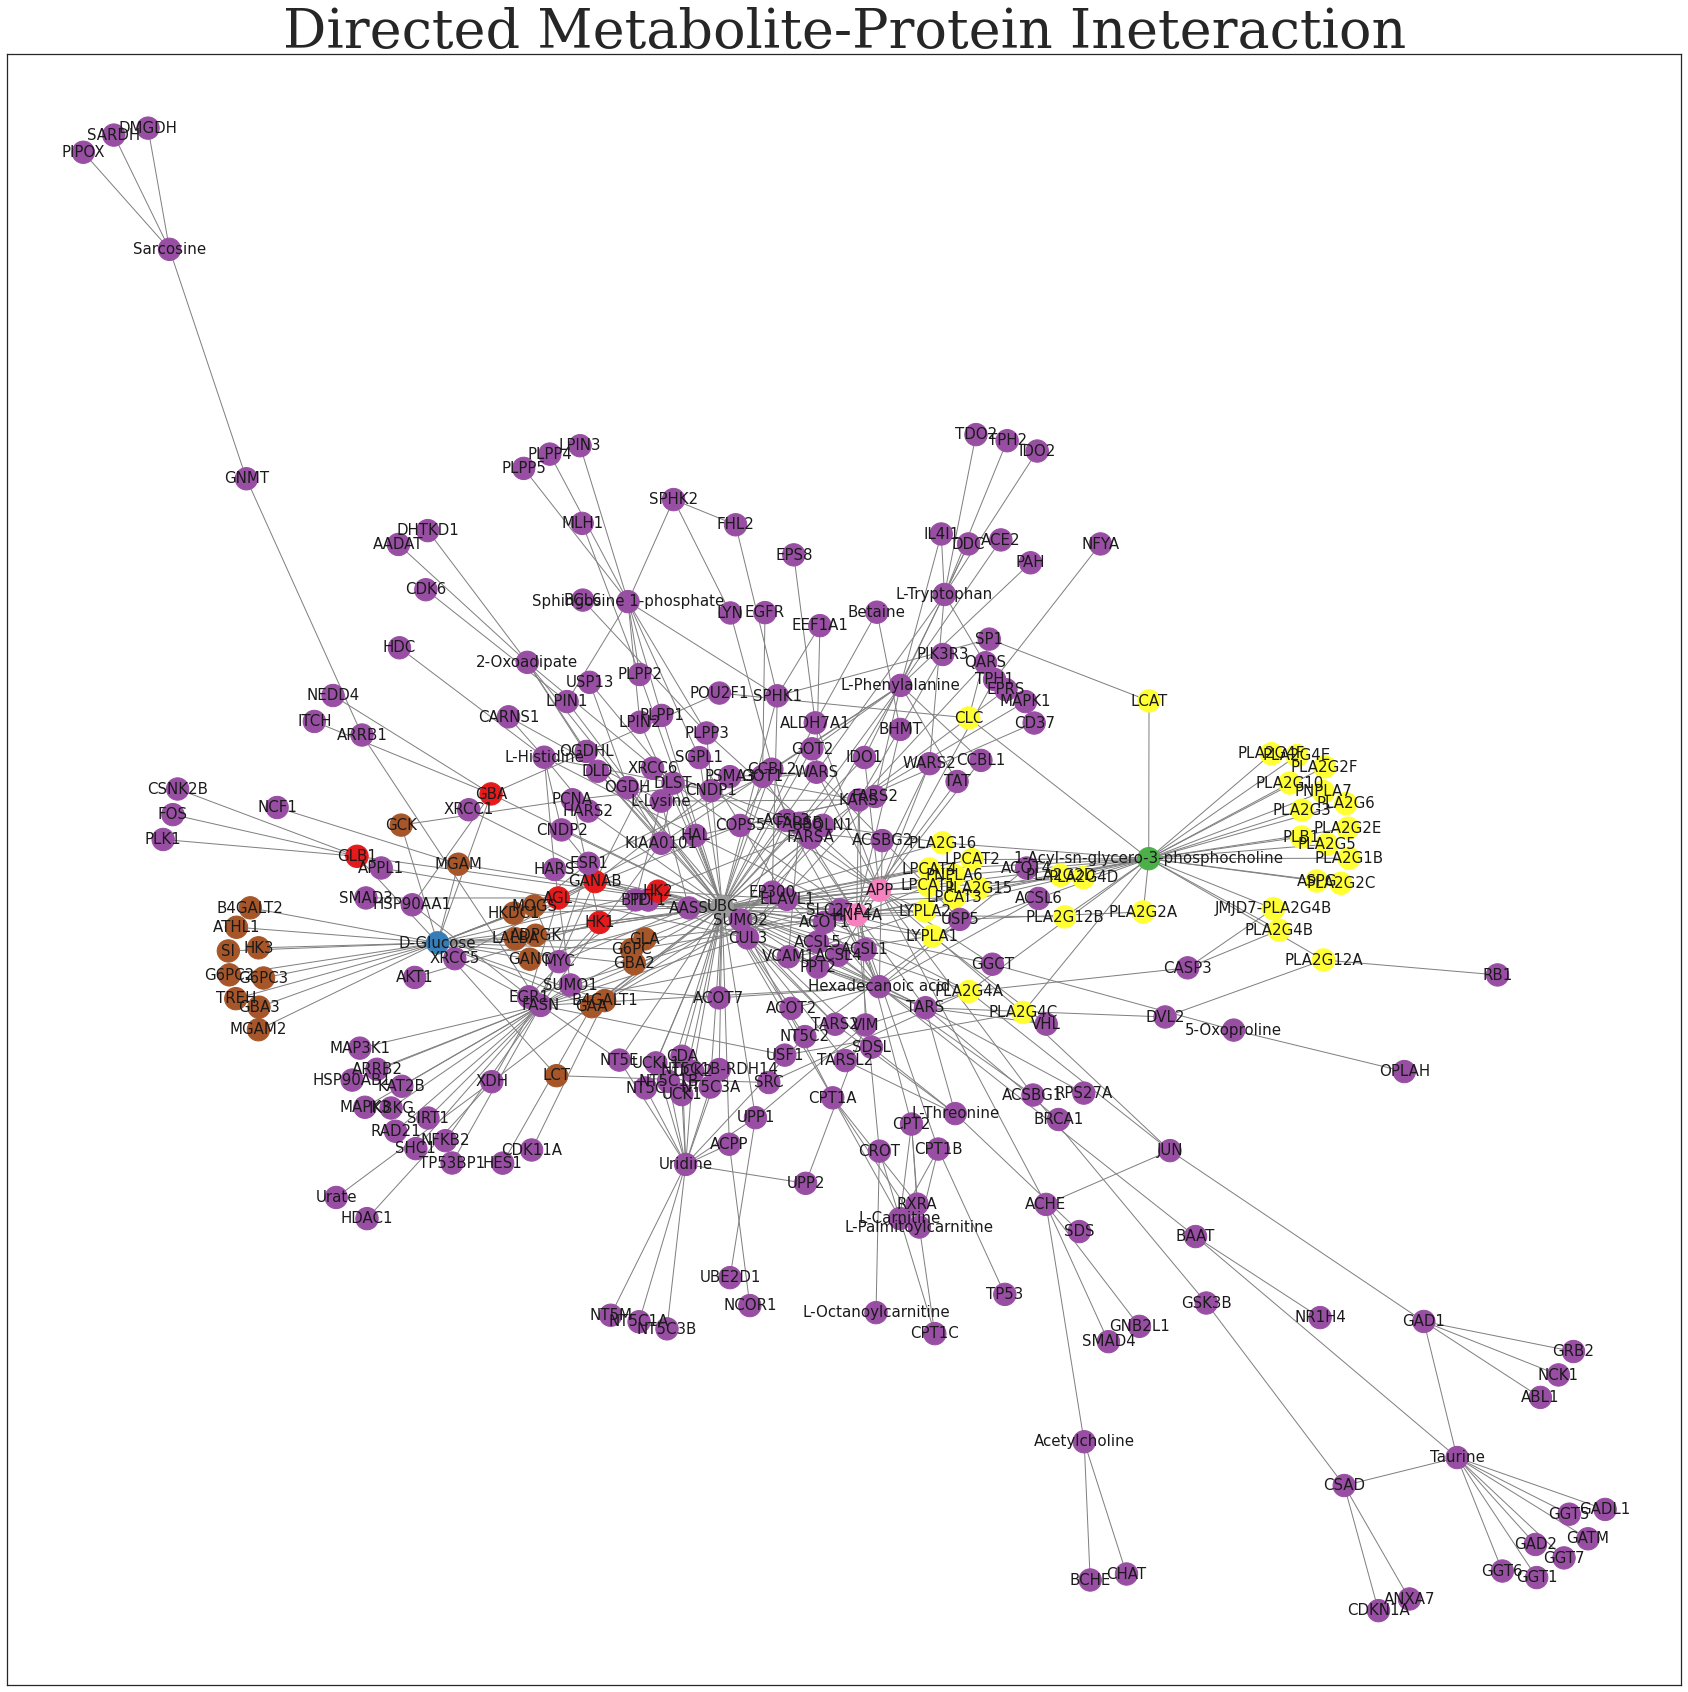

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_networkx(G_undir , font_size=15, cmap='Set1', edge_color='gray', node_size=500, arrowsize=30 , node_color=groupings )
KEGG_ID = "HSA05224"
plt.title("Directed Metabolite-Protein Ineteraction")
plt.savefig('directed-graph.eps', dpi=300)

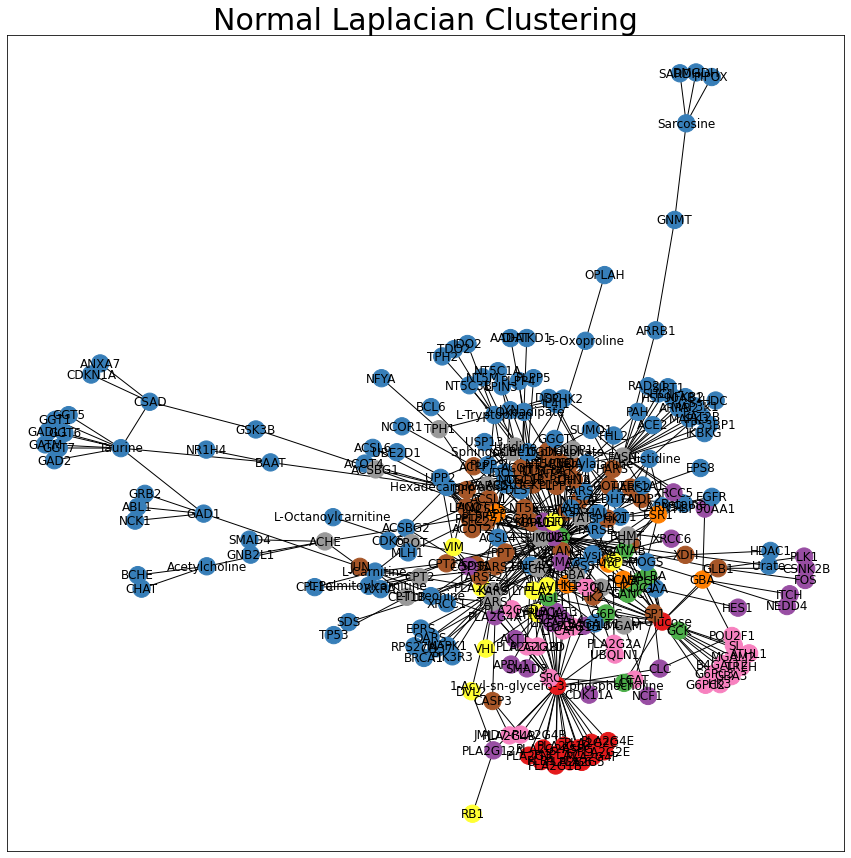

In [ ]:
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_undir, node_color=groupings , cmap='Set1')
plt.title("Normal Laplacian Clustering" , fontsize=30)
plt.show()